# Trabalho Prático

Cálculo Numérico (SME0104)
Professora Cynthia Lage Ferreira

Alunos:
Clara Ernesto de Carvalho - N USP: 14559479
Renan Parpinelli Scarpin - N USP: 14712188

In [247]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')
import scipy.interpolate as spi

## 1 - Sistemas Lineares not Done

In [ ]:

#Func1 é uma função de decomposição L.U. clássica que elimina todas as entradas abaixo do pivô
#A Complexidade é O((n^3)/3)
def func1(A):
    n = A.shape[0] #Extrai as dimensões de A
    U = A.copy() #Copia a A para U
    L = np.eye(n) #Define a L como uma matriz identidade das dimensões de A
    for j in range (n - 1): #Percorre todas as colunas de A
        for i in range (j + 1,n): #Percorre todas as linhas de A
            L[i,j] = U[i,j] / U[j,j] #Constroi o elemento L[i,j] a partir de U
            U[i,j:n] = U[i,j:n] - L [i,j] * U[j,j:n] #Eliminação das linhas abaixo do Pivô
    return (L,U) #Retorna as matrizes L e U da decomposição

def func2 (A,p):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n)
    for j in range (n - 1):
        v = min (n,j+p+1)
        for i in range (j+1,v):
            L[i,j] = U[i,j] / U[j,j]
            U[i,j:v] = U[i,j:v] - L [i,j] * U[j,j:v]
    return (L,U)


#Exemplo
n = 2000
p = 2
A = np.zeros((n,n))
for i in range (n):
    for j in range (max(0,i-p),min(n,i+p+1)):
        A[i,j] = np.random.normal()

starttime = time.time()
(L,U) = func1(A)
endtime=time.time()
print(endtime - starttime)
starttime=time.time()
(L,U)=func2(A,p)
endtime=time.time()
print(endtime - starttime)
print(np.linalg.norm(L@U - A))
print(np.linalg.norm(L@U - A))

8.912205696105957
0.020061731338500977
7.576474603497137e-13
7.576474603497137e-13


# 4) Interpolação

Nesse exercício teremos que comparar diversos métodos em diferentes cenários para interpolação.

## a)
A seguir foram desenvolvidas as funções para interpolação utilizando método de newton e método de lagrange.

A diferença entre as duas funções é que a de newton recebe um vetor de x e retorna um vetor de resultados y, enquanto a de lagrange recebe um valor x e retorna um valor y.
Como não haverá comparação de tempo, a lagrange foi desenvolvida assim pois consideramos mais intuitivo, e a não ser que o numpy utilize paralelização nos cálculos com vetores, não haverá diferença de complexidade entre ambas as opções de implementação

In [569]:
def newton_interpolation(xi, yi, x):
    n = np.size(xi)
    nr = np.size(x)
    a = np.ones((n,nr))
    diffs = np.zeros((n,n))
    diffs[:,0] = yi

    # Diff matrix
    for j in np.arange(n-1):
        for i in np.arange(n-j-1):
            diffs[i,j+1] = (diffs[i+1,j]-diffs[i,j])/(xi[i+j+1]-xi[i])

    for i in np.arange(1,n):
        a[i,:] = a[i-1,:]*(x-xi[i-1])

    y = diffs[0,:].dot(a)

    return y

def lagrange_interpolation(xi, yi, x):
    n = np.size(xi)

    l = np.ones(n)

    # calculate the l_k(x) coefficients
    for k in range(n):
        for i in range(n):
            if i != k:
                l[k] = l[k]*((x-xi[i])/(xi[k]-xi[i]))
    # calculate the final value for P(x) = y
    y = 0
    for i in range(n):
        y += l[i]*yi[i]
    return y



## b)

Iremos gerar o gráfico utilizando 11 pontos, tanto com interpolação de Lagrange quanto Newton

In [570]:
# info from the exercise description
f = lambda t: 1/(1+(25*t*t))
a = -1
b = 1
n = 11

In [571]:
# generate the points for interpolation
xi = np.linspace(a,b,n, endpoint=True)
yi = np.array([f(i) for i in xi])

# generate the points for plotting
xs = np.linspace(a, b, num =101, endpoint=True)
yf = np.array([f(x) for x in xs])

### Lagrange

In [572]:
# calculate the y values using lagrange
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 11 points for interpolation
# this will be used in letter c) to compare with the 21 points
errors = ysl - yf
squared_errors = np.square(errors)
mse_11 = np.mean(squared_errors)

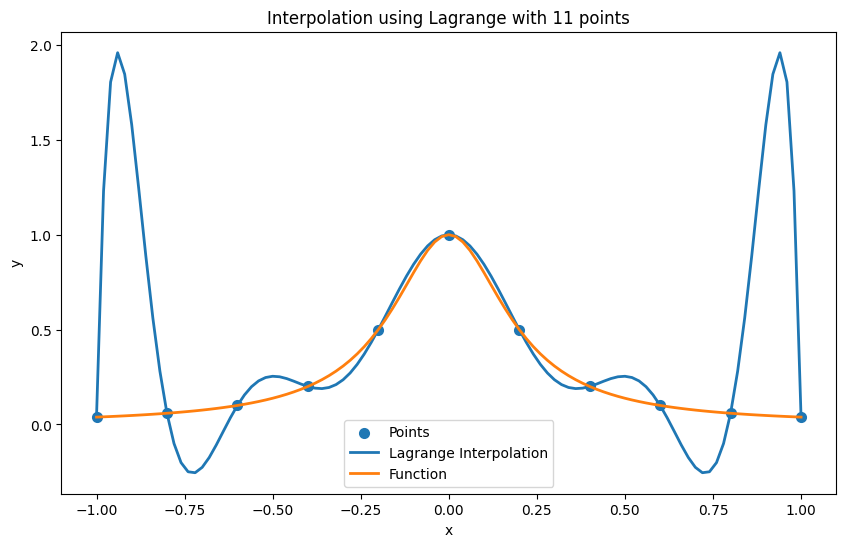

In [573]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

### Newton

In [574]:
# calculate the y values using newton
ysn = newton_interpolation(xi, yi, xs)

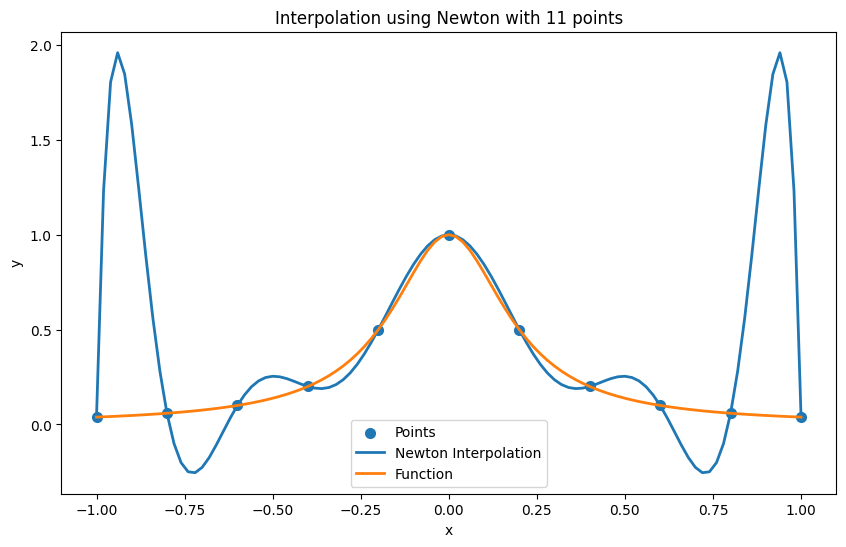

In [575]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

#### Mesmo gráfico

Como podemos ver ambos métodos resultaram no mesmo gráfico, isto se deve à prova de que há um único polinômio P(x) de grau n, que leva todo valor x ao seu valor y, dentre os x e y dos dados iniciais.

Isto pode ser comprovado com os seguintes passos:

##### Demonstração
O polinômio P(x) de grau n, precisa resultar em y_i para todo x_i presente nos dados, portanto podemos alcançar o sistema de equações:
$$
\begin{cases}
P_n(x_0) = \alpha_0 + \alpha_1 x_0 + \alpha_2 {x_0}^2 + ... + \alpha_n {x_0}^n
\\
...
\\
P_n(x_n) = \alpha_0 + \alpha_1 x_n + \alpha_2 {x_n}^2 + ... + \alpha_n {x_n}^n
\end{cases}
$$

A partir do sistema, podemos transformá-lo em sua forma matricial:
$$
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^n \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_n && {x_n}^2 && ... && {x_n}^n
\end{bmatrix}

\begin{bmatrix}
\alpha_0 \\
\vdots \\
\alpha_n
\end{bmatrix}

=

\begin{bmatrix}
y_0 \\
\vdots \\
y_n
\end{bmatrix}
$$

Assim, podemos notar que a matriz X definida como:
$$
X = 
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^n \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_n && {x_n}^2 && ... && {x_n}^n
\end{bmatrix}
$$

é uma matriz de vandermond.

Como temos a condição $ x_i \neq x_j,  \forall x, j$, então o determinante da matriz X é diferente de 0. ($ det(X) \neq 0 $)

Ou seja, a matriz X é invertível, e haverá um único conjunto de valores $ \alpha_i $, que resolvem o sistema. E este conjunto de valores por consequência determinam um único polinômio P(x) de grau n.


##### Conclusão
Como há um único polinômio P(x) de grau n que resolve o sistema de equações iniciais, e tanto os métodos de Lagrange quanto Newton precisam resolvem este sistema, então o polinômio alcançado por ambos os métodos precisam ser os mesmos


## c)
Neste exercício iremos utilizar 21 pontos para iterpolar a função f.
Veremos que o erro quadrático médio é maior nesse caso, e que isso ocorre devido ao fenômeno de Runge

In [576]:
# We substitute the value of n points to 21,
# and run the code of letter b) again.
n = 21

In [577]:
xi = np.linspace(a,b,n, endpoint=True)
yi = np.array([f(i) for i in xi])

### Lagrange

In [578]:
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 21 points for interpolation
errors = ysl - yf
squared_errors = np.square(errors)
mse_21 = np.mean(squared_errors)

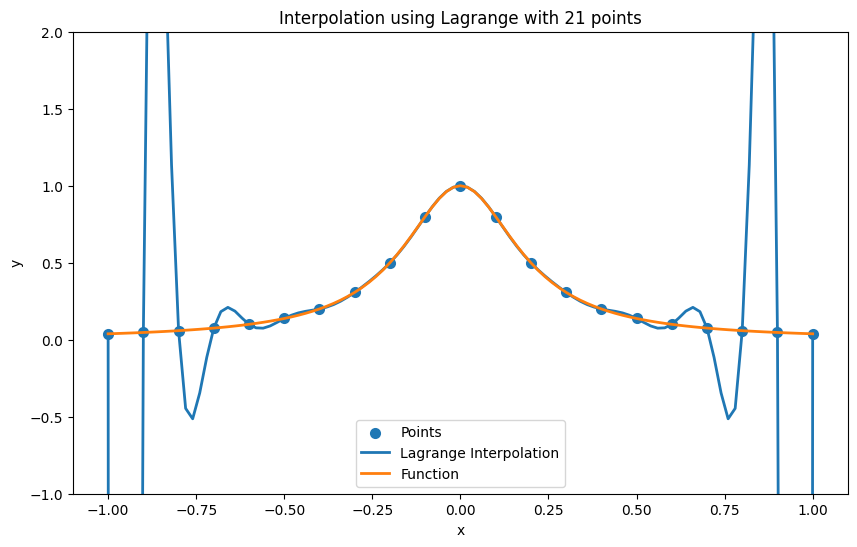

In [579]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.ylim(-1, 2)
plt.show()

### Newton

In [580]:
ysn = newton_interpolation(xi, yi, xs)

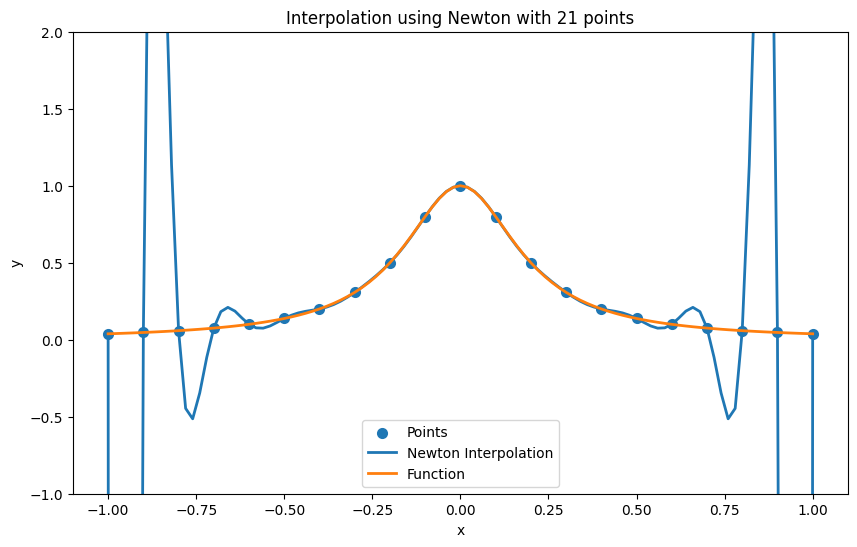

In [581]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.ylim(-1, 2)
plt.show()

In [582]:
print(f'MSE with 11 equally distributed points: {mse_11}')
print(f'MSE with 21 equally distributed points: {mse_21}')
print(f'Errors ratio: {mse_21/mse_11}')

MSE with 11 equally distributed points: 0.33328575573986596
MSE with 21 equally distributed points: 137.81624664157084
Errors ratio: 413.5077610371632


#### Análise

Utilizando os valores que foram mostrados na célula acima, o valor de erro quadrático médio utilizando 21 pontos para interpolação é 413 vezes maior do que utilizando 11 pontos.
> Calculamos os erros utilizando apenas Lagrange, uma vez que o polinômio que Newton gera é o mesmo, e calcular utilizando-o resultaria no mesmo valor

Esta enorme diferença se deve ao fenômeneo de Runge.

#### Fenômeno de Runge

O Fenômeno de Runge é a afirmação de que não há nenhuma garantia de que o Polinômio $ P_n$ de grau n converge para f, conforme o grau n tende a infinito, caso a distribuição de nós tenha x uniforme.

Sendo assim, conforme o número de nós, e consequentemente o grau do polinômio, aumenta, o erro da interpolação tende a aumentar

Para evitar este problema, duas alternativas são utilizadas
- Interpolação por partes (Será feita na letra d) )
- Nós de Chebyshev (Será feita na letra e) )


## d)
Neste exercício iremos utilizar splines utilizando 21 nós para realizar interpolação por partes. Como a interpolação por partes utiliza apenas informação de nós próximos, ela não é afetada pelo fenômeno de Runge.

### Linear

In [583]:
spline = spi.interp1d(xi, yi, kind='slinear')
yss = spline(xs)
# we calculate the mean squared error using the 21 points for interpolation
# using linear splines, this will be compared with earlier methods and cubic splines
errors = yss - yf
squared_errors = np.square(errors)
mse_linear = np.mean(squared_errors)


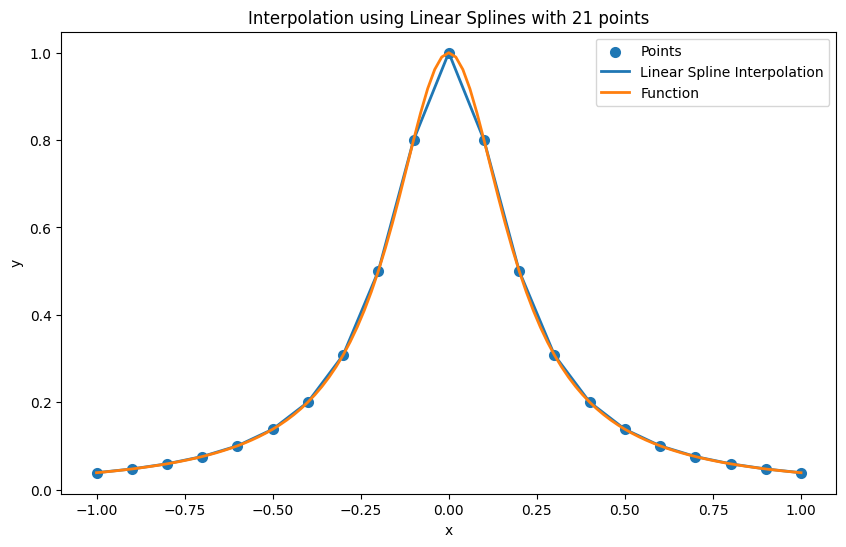

In [584]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Linear Splines with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,yss,label = 'Linear Spline Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()


### Cubica

In [585]:
spline = spi.interp1d(xi, yi, kind='cubic')
yss = spline(xs)
# calculate the mean squared error using the cubic splines
# this will be compared with earlier methods and linear splines
errors = yss - yf
squared_errors = np.square(errors)
mse_cubic = np.mean(squared_errors)


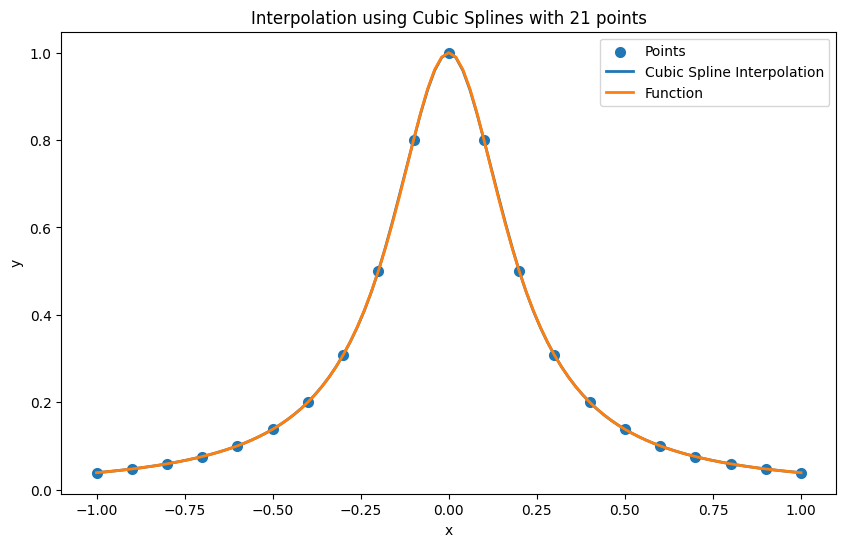

In [586]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Cubic Splines with {n} points')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,yss,label = 'Cubic Spline Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

In [587]:
print(f'MSE for Lagrange using 21 points: {mse_21}')
print(f'MSE for linear splines using 21 points: {mse_linear}')
print(f'MSE for cubic splines using 21 points: {mse_cubic}')

MSE for Lagrange using 21 points: 137.81624664157084
MSE for linear splines using 21 points: 0.00010879299328245075
MSE for cubic splines using 21 points: 7.649788171824937e-07


#### Análise

Como podemos ver, ao utilizar interpolação por partes, o erro quadrático médio dos resultados diminuiu significantemente, mesmo mantendo o número de 21 pontos para interpolação.

Isto se deve ao fato mencionado anteriormente, de que este método calcula um polinômio para cada intervalo entre dois nós, e assim utiliza apenas a informação de de nós próximo, sem aumentar o grau do polinômio

Também é importante ressaltar que o erro utilizando splines cúbicas foi notavelmente menor do que utilizando splines lineares, o que é explicado pelo fato de que splines cúbicas também interpolam as derivadas de primeiro e segundo grau dos polinômios, assim gerando curvas fluidas e que aproximam melhor a função f.

## e)

Neste exercício iremos utilizar nós de Chebyshev para evitar o fenômeno de Runge.

Ao minimizar o erro da interpolação baseado na posição x dos nós, encontramos os nós de chebyshev, e assim podemos utilizar eles em interpolação com graus maiores.

In [588]:
# function to generate Chebyshev nodes based on [a,b] range
def gen_chebyshev_nodes(n, a, b):
    nodes = []
    for k in range(n):
        nodes.append(0.5 * (a + b) + 0.5 * (b - a) * np.cos((2*k + 1) * np.pi / (2*(n+1))))
    return nodes

### 11 points

In [589]:
n = 11

In [590]:
xi = np.array(gen_chebyshev_nodes(n, a, b))
yi = np.array([f(i) for i in xi])

#### Lagrange

In [591]:
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 11 points for interpolation
# using Chebyshev nodes, this will be compared with the same method using equally spaced nodes
errors = ysl - yf
squared_errors = np.square(errors)
mse_11_chebyshev = np.mean(squared_errors)


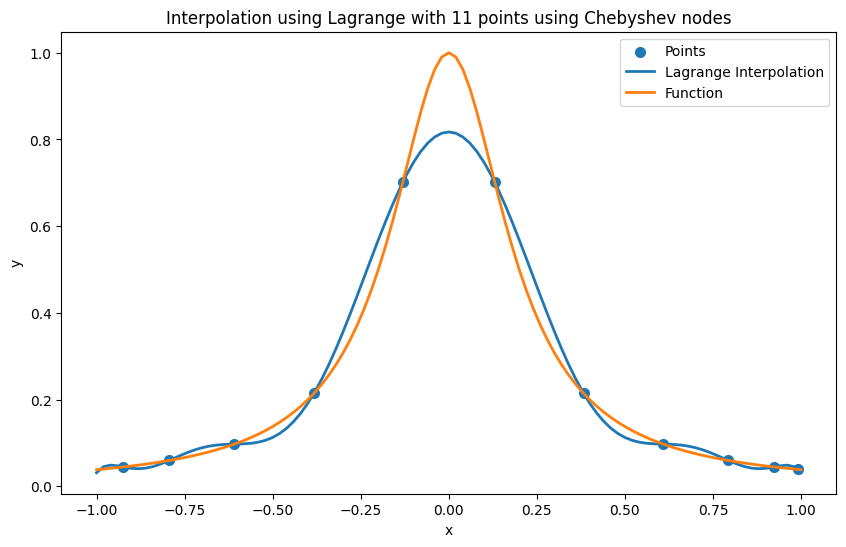

In [592]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

#### Newton

In [593]:
ysn = newton_interpolation(xi, yi, xs)

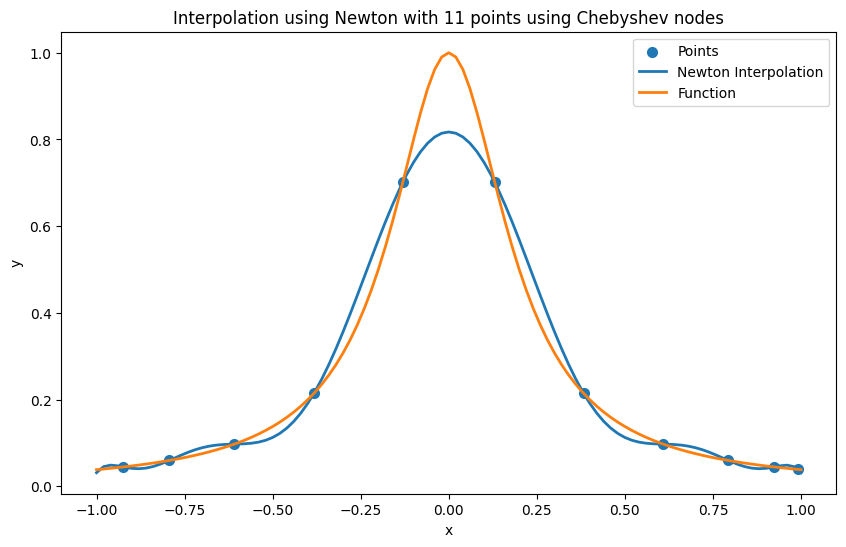

In [594]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

### 21 points

In [595]:
n = 21

In [596]:
xi = np.array(gen_chebyshev_nodes(n, a, b))
yi = np.array([f(i) for i in xi])

#### Lagrange

In [597]:
ysl = np.array([lagrange_interpolation(xi, yi, x) for x in xs])

# we calculate the mean squared error using the 21 points for interpolation
# using Chebyshev nodes, this will be compared with the same method using equally spaced nodes
errors = ysl - yf
squared_errors = np.square(errors)
mse_21_chebyshev = np.mean(squared_errors)


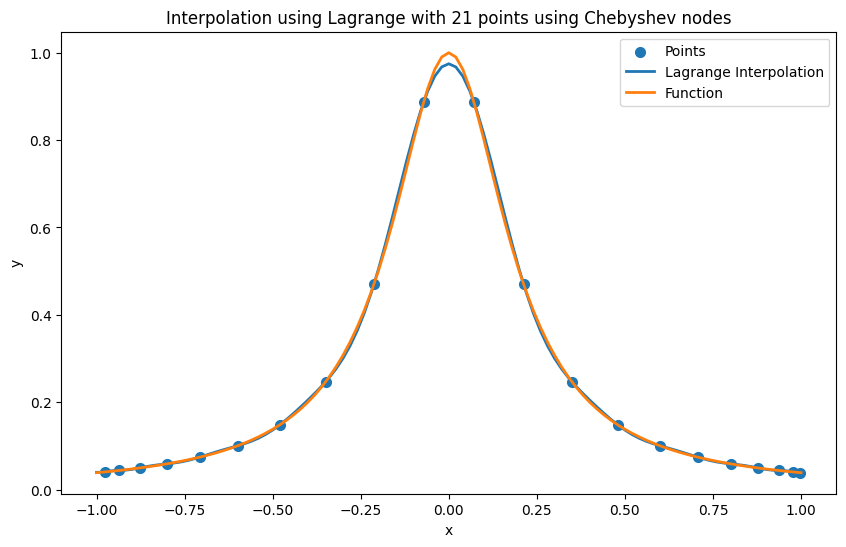

In [598]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Lagrange with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysl,label = 'Lagrange Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

#### Newton

In [599]:
ysn = newton_interpolation(xi, yi, xs)

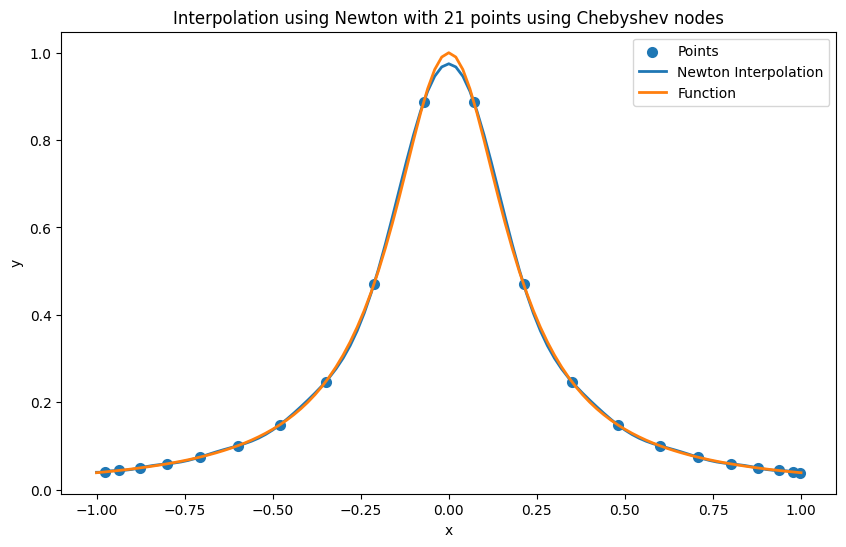

In [600]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Interpolation using Newton with {n} points using Chebyshev nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi,yi,label = 'Points',linewidth = 2)
plt.plot(xs,ysn,label = 'Newton Interpolation',linewidth = 2)
plt.plot(xs,yf,label = 'Function',linewidth = 2)
plt.legend()
plt.show()

In [601]:
print(f'MSE for Lagrange with 11 points: {mse_11}')
print(f'MSE for Lagrange with 21 points: {mse_21}')
print(f'MSE for Lagrange with 11 points using Chebyshev nodes: {mse_11_chebyshev}')
print(f'MSE for Lagrange with 21 points using Chebyshev nodes: {mse_21_chebyshev}')
print(f'Ratio of MSE for 11 points not using Chebyshev nodes and using Chebyshev nodes: {mse_11/mse_11_chebyshev}')
print(f'Ratio of MSE for 21 points not using Chebyshev nodes and using Chebyshev nodes: {mse_21/mse_21_chebyshev}')

MSE for Lagrange with 11 points: 0.33328575573986596
MSE for Lagrange with 21 points: 137.81624664157084
MSE for Lagrange with 11 points using Chebyshev nodes: 0.0027156208585490758
MSE for Lagrange with 21 points using Chebyshev nodes: 4.95775137229128e-05
Ratio of MSE for 11 points not using Chebyshev nodes and using Chebyshev nodes: 122.72911908547374
Ratio of MSE for 21 points not using Chebyshev nodes and using Chebyshev nodes: 2779813.594764385


#### Análise

Como podemos ver com os erros quadráticos médios expostos na célula anterior,
ao utilizar os nós de Chebyshev conseguimos reduzir significantemente o erro da aproximação.

Isto se deve ao que foi comentado anteriormente, de que os nós de chebyshev são calculados utilizando a seguinte expressão:

$$x_i = \frac{a+b}{2} + \frac{b-a}{2} \cos\left(\frac{(2i+1)\pi}{2(n+1)}\right) 
\\ 
\forall i| 1 \leq i \leq n$$

A qual é alcançada ao minimizar o erro médio utilizando os valores x dos pontos usados para interpolação.

Assim, esta distribuição de pontos minimiza o Fenômeno de Runge.

# 5) Mínimos quadrados

## a)

Os códigos a seguir implementam a aproximação pelo método dos mínimos quadrados utilizando diferentes formas de calcular

O método MMQ, consiste em aproximar uma função $ f $ com um polinômio $ P $, ao minimizar o erro quadrático médio entre $ f $ e $P$

Para o caso discreto, em que não sabemos a função original e apenas temos um conjunto de dados, possuímos o seguinte conjunto de equações para aproximação por um polinômio P de grau m

$$
\begin{cases}
P_n(x_0) = \alpha_0 + \alpha_1 x_0 + \alpha_2 {x_0}^2 + ... + \alpha_m {x_0}^m
\\
...
\\
P_n(x_n) = \alpha_0 + \alpha_1 x_n + \alpha_2 {x_n}^2 + ... + \alpha_m {x_n}^m
\end{cases}
$$

Podemos reescrever em sua forma matricial:

$$
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^m \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_n && {x_n}^2 && ... && {x_n}^m
\end{bmatrix}

\begin{bmatrix}
\alpha_0 \\
\vdots \\
\alpha_m
\end{bmatrix}

=

\begin{bmatrix}
y_0 \\
\vdots \\
y_n
\end{bmatrix}
$$

A partir disso, podemos extrair uma matriz de vandermond, considerando apenas as primeiras m linhas do sistema

$$
\begin{bmatrix}
1 && x_0 && {x_0}^2 && ... && {x_0}^m \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_m && {x_m}^2 && ... && {x_m}^m
\end{bmatrix}
$$

Como neste caso, temos a seguinte condição: $ x_i \neq x_j \forall i,j | i \neq j$, então o determinantes desta matriz é diferente de 0, e assim os vetores coluna da matriz são linearmente independentes, e formam uma base para o espaço polinomial de grau m.

Chamaremos o conjunto de vetores coluna de $U = \{u_1, u_2, ..., u_m\}$.

Para aproximar a função original, realizaremos a projeção ortogonal usando o produto interno usual, utilizando a base $U$.

$$
\begin{bmatrix}
\langle u_0, u_0 \rangle & \langle u_1, u_0 \rangle & \dots & \langle u_m, u_0 \rangle \\
\langle u_0, u_1 \rangle & \langle u_1, u_1 \rangle & \dots & \langle u_m, u_1 \rangle \\
\vdots & \vdots & \ddots & \vdots \\
\langle u_0, u_m \rangle & \langle u_1, u_m \rangle & \dots & \langle u_m, u_m \rangle
\end{bmatrix}
\begin{bmatrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_m\end{bmatrix}
=\begin{bmatrix}
\langle y, u_0 \rangle \\
\langle y, u_1 \rangle \\
\vdots \\
\langle y, u_m \rangle
\end{bmatrix}
$$

### Implementação 1
Reescrevendo os produtos internos como produtos de matrizes, obtemos:

$$
\begin{equation}
X^T X\alpha = X^T y
\end{equation}
$$

Dessa forma, podemos encontrar os valores para o vetor de coeficientes $\alpha$, ao resolver o sistema $A\alpha = b$, com valores $A = X^T X$, $b=X^T y$.

Este método é o que é empregado na implementação 1 informada na questão, e também disponível na célula de código abaixo

### Implementação 2

A partir da Equação 1, podemos realizar a decomposição QR em todas as matrizes $X$, e com manipulação algébrica alcançamos a equação abaixo

$$
\begin{equation}
R\alpha = Q^T y
\end{equation}
$$

E assim, podemos calcular o vetor $\alpha$ ao resolver o sistema $A\alpha = b$, com valores $A = R$, $b = Q^T y$

Este método é o que é empregado na segunda implementação informada na questão, e também está disponível na célula de código abaixo

### Comparação

Os dois métodos possuem mesma complexidade, a qual é $O(mn^2)$ para m próximo de n, e sendo assim não possuem grande diferença em questão de número de operações.

Entretanto, o segundo método possui maior estabilidade numérica, uma vez que a multiplicação $X^TX$ é instável numericamente, e principalmente em matrizes com valores próximos de 0, pode gerar grande imprecisão numérica.

Portanto, para os fins desta questão, utilizaremos apenas a implementação 2, ou seja, a função com nome mmqQR.

In [ ]:
# Implementation 1
def mmq(x, y, k) :
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = np.linalg.solve(A, b)
    return a

# Implementation 2
def mmqQR(x, y, k):
    X = np.vander(x, k)
    (Q,R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y)
    a = np.linalg.solve(R, b)
    return a

## b)
Nesta questão iremos aproximar os dados disponíveis sobre os número de casos acumulados de Covid19 durante a pandemia no brasil, utilizando uma função exponencial

In [903]:
xs = np.linspace(0, 118, num=201, endpoint=True)

In [904]:
yiorig = np.loadtxt('casosacumuladosbrasilatuaizado.txt')
xiorig = np.arange(len(yiorig))

In [905]:
def get_exponential(days=118):
    if days > 0:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[:days]
        xi = np.arange(days)
    else:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[days:]
        xi = np.arange(118 + days, 118)
    print(len(yi))
    print(len(xi))

    yiln = np.log(yi)
    
    alphas = mmqQR(xi, yiln, 2)
    
    a = np.exp(alphas[1])
    b = np.exp(alphas[0])
    print(a, b)

    f = lambda x: a * b**x
    ymmqexp = [f(x) for x in xs]

    yeorig = [f(x) for x in xiorig]
    errore = yeorig - yiorig
    squared_errors = np.square(errore)
    mseexp = np.mean(squared_errors)

    return ymmqexp, mseexp

In [906]:
ymmqexp, mseexp = get_exponential()

118
118
35.313041543172616 1.1113520177397236


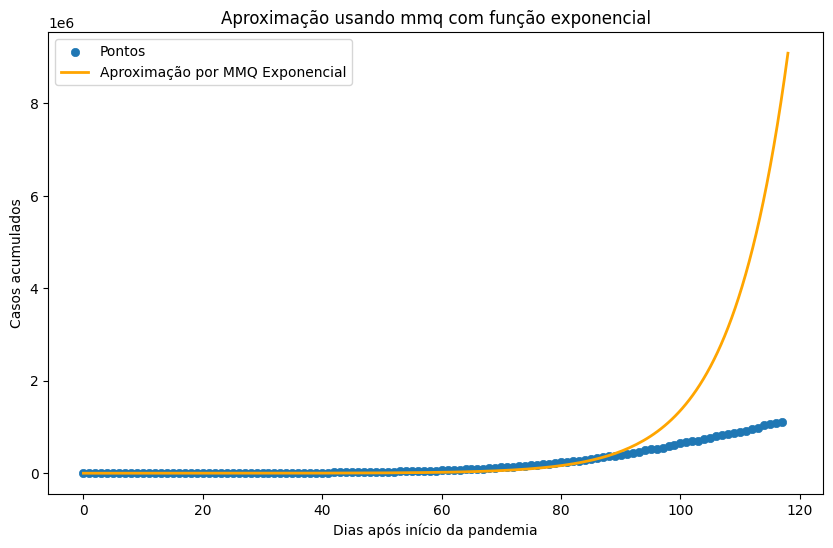

In [907]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq com função exponencial')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,ymmqexp,label = 'Aproximação por MMQ Exponencial',linewidth = 2, color='orange')
plt.legend()
plt.show()

### Análise

Como podemos ver, a função exponencial aproximou os dados, entretanto desviou nos últimos dias

## c)
Nesta questão iremos aproximar os dados disponíveis sobre os número de casos acumulados de Covid19 durante a pandemia no brasil, utilizando funções polinomiais de grau 4, 5 e 6

In [908]:
def get_polynomials(days=118):
    if days > 0:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[:days]
        xi = np.arange(days)
    else:
        yi = np.loadtxt('casosacumuladosbrasilatuaizado.txt')[days:]
        xi = np.arange(118 + days, 118)
    print(len(yi))
    print(len(xi))

    alphas4 = mmqQR(xi, yi, 5)
    alphas5 = mmqQR(xi, yi, 6)
    alphas6 = mmqQR(xi, yi, 7)

    f4 = lambda x: alphas4[-1] + alphas4[-2]*x + alphas4[-3]*x**2 + alphas4[-4]*x**3 + alphas4[-5]*x**4
    f5 = lambda x: alphas5[-1] + alphas5[-2]*x + alphas5[-3]*x**2 + alphas5[-4]*x**3 + alphas5[-5]*x**4 + alphas5[-6]*x**5
    f6 = lambda x: alphas6[-1] + alphas6[-2]*x + alphas6[-3]*x**2 + alphas6[-4]*x**3 + alphas6[-5]*x**4 + alphas6[-6]*x**5 + alphas6[-7]*x**6
    
    y4 = [f4(x) for x in xs]
    y5 = [f5(x) for x in xs]
    y6 = [f6(x) for x in xs]

    y4orig = [f4(x) for x in xiorig]
    y5orig = [f5(x) for x in xiorig]
    y6orig = [f6(x) for x in xiorig]

    error4 = y4orig - yiorig
    error5 = y5orig - yiorig
    error6 = y6orig - yiorig
    squared_error4 = np.square(error4)
    squared_error5 = np.square(error5)
    squared_error6 = np.square(error6)
    mse_4 = np.mean(squared_error4)
    mse_5 = np.mean(squared_error5)
    mse_6 = np.mean(squared_error6)

    return y4, y5, y6, mse_4, mse_5, mse_6



In [909]:
y4, y5, y6, mse_4, mse_5, mse_6 = get_polynomials()

118
118


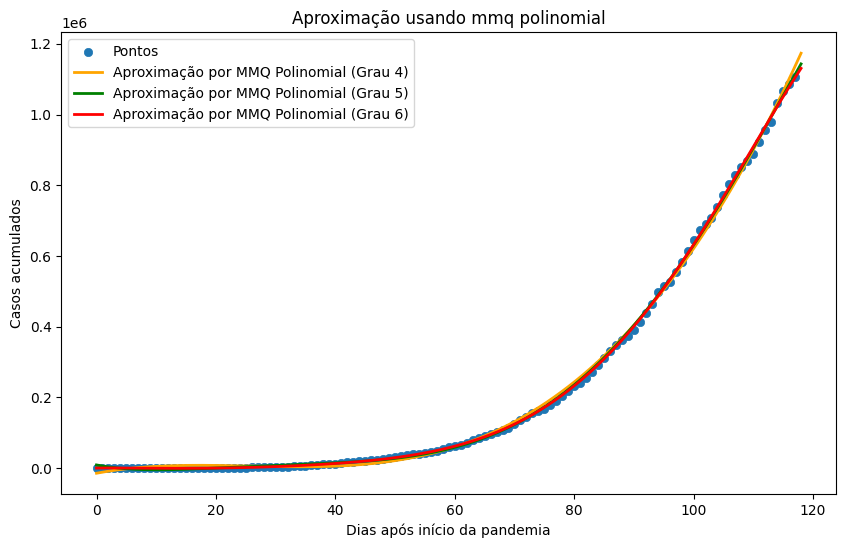

In [910]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq polinomial')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,y4,label = 'Aproximação por MMQ Polinomial (Grau 4)',linewidth = 2, color='orange')
plt.plot(xs,y5,label = 'Aproximação por MMQ Polinomial (Grau 5)',linewidth = 2, color='green')
plt.plot(xs,y6,label = 'Aproximação por MMQ Polinomial (Grau 6)',linewidth = 2, color='red')
plt.legend()
plt.show()

### Análise

Como podemos ver, as funções polinomiais conseguiram aproximar os dados muito bem, mesmo em relação aos dados dos últimos dias, sem grande diferença entre os diferentes graus

## d)
Neste item, iremos comparar os erros de truncamento entre os 4 métodos de aproximação utilizados, os erros já foram calculados anteriormente, uma vez que são o retorno das funções get_polynomials e get_exponential.

In [911]:
print(f'Truncate error for exponential: {mseexp}')
print(f'Truncate error for polynomial (degree 4): {mse_4}')
print(f'Truncate error for polynomial (degree 5): {mse_5}')
print(f'Truncate error for polynomial (degree 6): {mse_6}')
print(f'Ratio of MSE for polynomial degree 4 and exponential: {mse_4/mseexp}')
print(f'Ratio of MSE for polynomial degree 5 and exponential: {mse_5/mseexp}')
print(f'Ratio of MSE for polynomial degree 6 and exponential: {mse_6/mseexp}')

Truncate error for exponential: 1930127455431.5308
Truncate error for polynomial (degree 4): 99196816.73909728
Truncate error for polynomial (degree 5): 34851290.38071359
Truncate error for polynomial (degree 6): 26297491.827955347
Ratio of MSE for polynomial degree 4 and exponential: 5.139392036518087e-05
Ratio of MSE for polynomial degree 5 and exponential: 1.8056470976898087e-05
Ratio of MSE for polynomial degree 6 and exponential: 1.3624743668586307e-05


### Análise

A célula de código acima mostra os erros de cada método utilizado.

Podemos ver que os que utilizaram funções polinomiais para aproximar alcançaram valores mais próximos, sendo que seus erros de truncamento estão na ordem de ${10}^{-5}$ menores.

Isto pode ser explicado pelos métodos polinomiais utilizarem mais que o dobro de coeficientes que o método exponencial, assim possuindo um espaço de função com mais dimensões, por consequência possuindo mais informação, e podendo aproximar melhor a função original

## e)

In [912]:
y4, y5, y6, mse_4, mse_5, mse_6 = get_polynomials(20)
ymmqexp, mseexp = get_exponential(20)

20
20
20
20
0.5965414187660085 1.3717182549417715


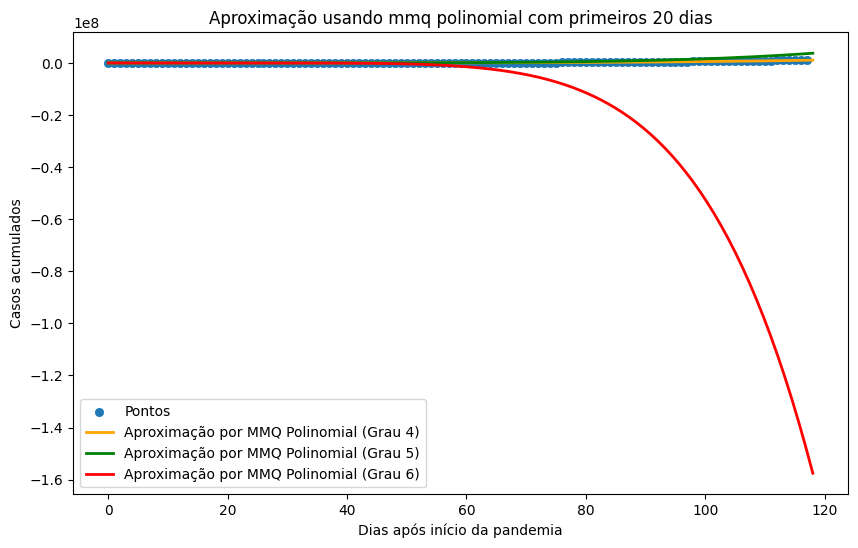

In [913]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq polinomial com primeiros 20 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,y4,label = 'Aproximação por MMQ Polinomial (Grau 4)',linewidth = 2, color='orange')
plt.plot(xs,y5,label = 'Aproximação por MMQ Polinomial (Grau 5)',linewidth = 2, color='green')
plt.plot(xs,y6,label = 'Aproximação por MMQ Polinomial (Grau 6)',linewidth = 2, color='red')
plt.legend()
plt.show()

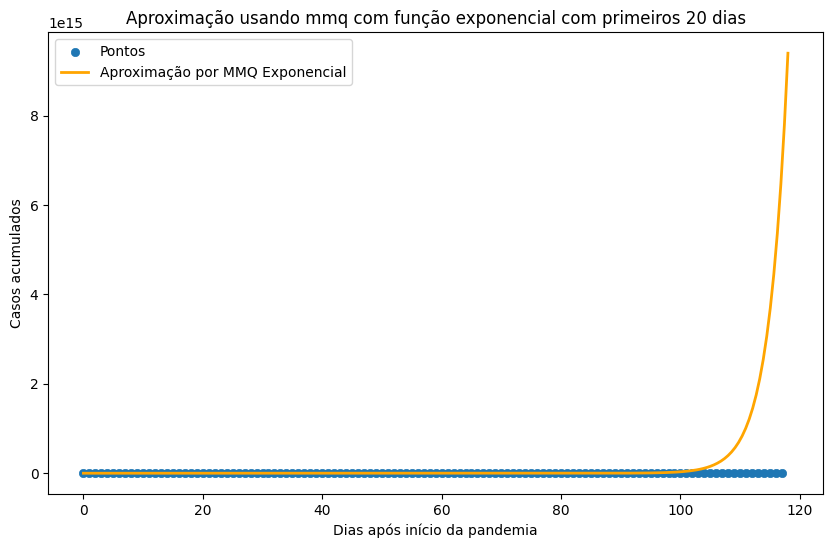

In [914]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq com função exponencial com primeiros 20 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,ymmqexp,label = 'Aproximação por MMQ Exponencial',linewidth = 2, color='orange')
plt.legend()
plt.show()

In [915]:
print(f'Truncate error for exponential: {mseexp}')
print(f'Truncate error for polynomial (degree 4): {mse_4}')
print(f'Truncate error for polynomial (degree 5): {mse_5}')
print(f'Truncate error for polynomial (degree 6): {mse_6}')
print(f'Ratio of MSE for polynomial degree 4 and exponential: {mse_4/mseexp}')
print(f'Ratio of MSE for polynomial degree 5 and exponential: {mse_5/mseexp}')
print(f'Ratio of MSE for polynomial degree 6 and exponential: {mse_6/mseexp}')

Truncate error for exponential: 8.484825821641608e+29
Truncate error for polynomial (degree 4): 2234863743.824446
Truncate error for polynomial (degree 5): 497035189922.00183
Truncate error for polynomial (degree 6): 1666129023459768.8
Ratio of MSE for polynomial degree 4 and exponential: 2.633953590566523e-21
Ratio of MSE for polynomial degree 5 and exponential: 5.857930385020415e-19
Ratio of MSE for polynomial degree 6 and exponential: 1.963657308332834e-15


## f)

In [916]:
y4, y5, y6, mse_4, mse_5, mse_6 = get_polynomials(-50)
ymmqexp, mseexp = get_exponential(-50)


50
50
50
50
5027.402520445858 1.0487908743252636


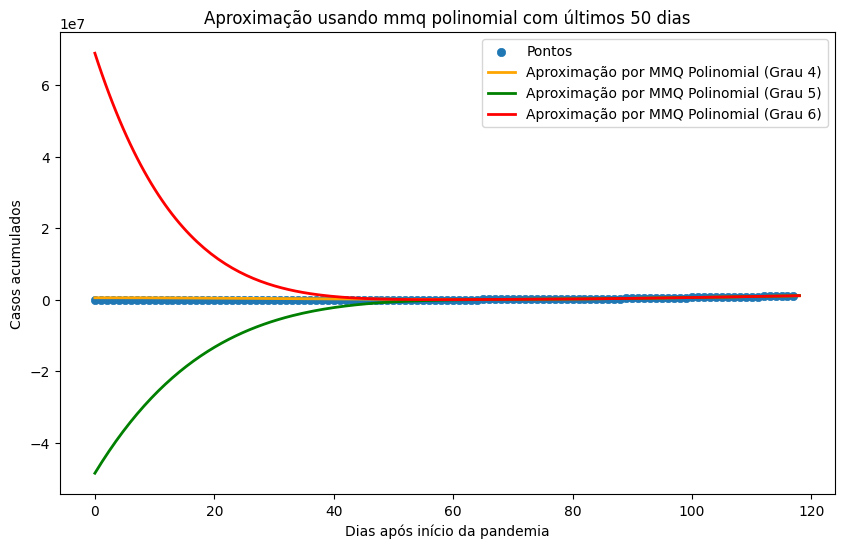

In [917]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq polinomial com últimos 50 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,y4,label = 'Aproximação por MMQ Polinomial (Grau 4)',linewidth = 2, color='orange')
plt.plot(xs,y5,label = 'Aproximação por MMQ Polinomial (Grau 5)',linewidth = 2, color='green')
plt.plot(xs,y6,label = 'Aproximação por MMQ Polinomial (Grau 6)',linewidth = 2, color='red')
plt.legend()
plt.show()

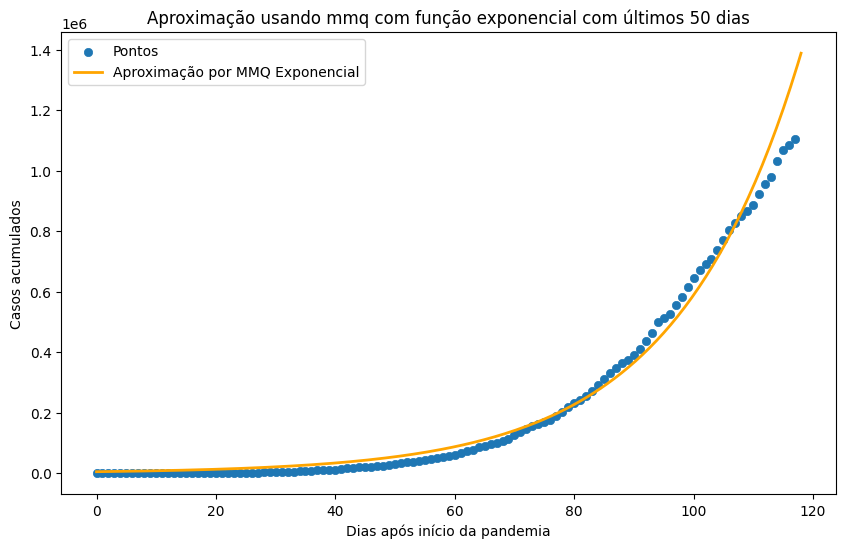

In [918]:
plt.figure(figsize=(10,6),facecolor='white')
plt.title(f'Aproximação usando mmq com função exponencial com últimos 50 dias')
plt.xlabel('Dias após início da pandemia')
plt.ylabel('Casos acumulados')
plt.scatter(xiorig,yiorig,label = 'Pontos',linewidth = 0.5)
plt.plot(xs,ymmqexp,label = 'Aproximação por MMQ Exponencial',linewidth = 2, color='orange')
plt.legend()
plt.show()

In [919]:
print(f'Truncate error for exponential: {mseexp}')
print(f'Truncate error for polynomial (degree 4): {mse_4}')
print(f'Truncate error for polynomial (degree 5): {mse_5}')
print(f'Truncate error for polynomial (degree 6): {mse_6}')
print(f'Ratio of MSE for polynomial degree 4 and exponential: {mse_4/mseexp}')
print(f'Ratio of MSE for polynomial degree 5 and exponential: {mse_5/mseexp}')
print(f'Ratio of MSE for polynomial degree 6 and exponential: {mse_6/mseexp}')

Truncate error for exponential: 1700936223.1217828
Truncate error for polynomial (degree 4): 71574673330.75302
Truncate error for polynomial (degree 5): 169080113302457.88
Truncate error for polynomial (degree 6): 268486475084956.7
Ratio of MSE for polynomial degree 4 and exponential: 42.07957497629731
Ratio of MSE for polynomial degree 5 and exponential: 99404.14637777525
Ratio of MSE for polynomial degree 6 and exponential: 157846.29161003747


## g)